In [1]:
# # !!! only uncomment and run when using colab !!!
#import os
#! git clone https://github.com/Plant-Root-Soil-Interactions-Modelling/CPlantBox # downloading the source code
#os.chdir("/content/CPlantBox/")
#! git pull
#! cmake .
#! make
#os.chdir("/content/CPlantBox/tutorial/jupyter/summer_school_2022/")

import os

#is the notebook running on Colab?
if 'COLAB_JUPYTER_TRANSPORT' in os.environ.keys():
    isColab = True
    sourcedir =os.getcwd()+ "/CPlantBox"
    filedir = sourcedir +"/tutorial/jupyter/teaching"
else:
    isColab = False
    sourcedir = os.getcwd()+"/../../.."
    filedir = os.getcwd()
#this can take some minutes
if isColab:
    # downloading the source code
    ! git clone https://github.com/Plant-Root-Soil-Interactions-Modelling/CPlantBox --depth=1 --single-branch -b stable_v2.1
    os.chdir(sourcedir)
    !apt install libeigen3-dev
    ! apt install llvm-dev
    !pip3 install vtk
    !sudo DEBIAN_FRONTEND=noninteractive apt-get install -yq xvfb
    !pip install -q 'xvfbwrapper~=0.2.9'
    if 'vdisplay' not in globals():

        import xvfbwrapper
        vdisplay = xvfbwrapper.Xvfb()
        vdisplay.start()
    os.environ["CUDA_VISIBLE_DEVICES"] = "1"


    if os.path.exists("./src/external/pybind11"):
        ! rm -rf src/external/pybind11 #delete folder
    ! git rm -r --cached src/external/pybind11 #take out git cache for pybind11
    ! git submodule add --force -b stable https://github.com/pybind/pybind11.git ./src/external/pybind11


    ! git pull
    ! cmake .
    ! make
    os.chdir(filedir)

Cloning into 'CPlantBox'...
remote: Enumerating objects: 1072, done.
remote: Counting objects: 100% (1072/1072), done.
remote: Compressing objects: 100% (824/824), done.
remote: Total 1072 (delta 274), reused 648 (delta 220), pack-reused 0
Receiving objects: 100% (1072/1072), 78.25 MiB | 8.51 MiB/s, done.
Resolving deltas: 100% (274/274), done.
Updating files: 100% (975/975), done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  libeigen3-doc libmpfrc++-dev
The following NEW packages will be installed:
  libeigen3-dev
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,056 kB of archives.
After this operation, 9,081 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libeigen3-dev all 3.4.0-2ubuntu2 [1,056 kB]
Fetched 1,056 kB in 0s (8,604 kB/s)
Selecting previously unselected package libeigen3-dev.
(Reading database ... 121913 files and dir

# Hintergrund:

Die Wurzelarchitektur von *Zea mays* Sorten besteht in den ersten Wochen aus primary, seminal, crown und lateral Wurzel (s. Bild a (Hochholdinger, 2009)). Sortenbedingt ist es an unterschiedliche Bedingungen agepasst. Sorten die in Regionen mit geringerer Wasserverfügbarkeit domestiziert wurden, unterscheiden sich bereits in den ersten 2 Wochen signifikant in ihrer Wurzelarchitektur. Neuste Studien zeigen, dass die Anpassungserscheinung des Sprösslings auf wenig Wasser, primär mit einer reduzierten Anzahl der seminalen Wurzeln und einhergehenden geringeren Abstand der lateralen Wurzeln auf der primary Wurzel, sowie der Wachstumsgeschwindigkeit der Primary, zusammenhängt (Peng et al., 2024). Modelle können uns helfen genauere Einblicke in die Anpassung der Architektur und der Funktion zu bekommen.


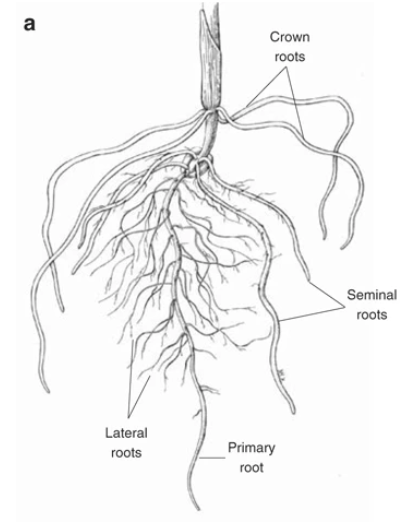





# 1. Aufgabe:

Nehmen Sie an, dass Sie zwei Sorten Mais vergleichen. Die Sorte "Durstig" ist in einer Region mit hoher Waserverfügbarkeit gezüchtet worden. Die Domnestizierung der Sorte "Genügsam" fand in einem semi-ariden Gebiet statt. Der oberirdische Teil der Pflanze ist gleich, die Unterschiede finden sich im Wurzelsystem. Die Sorte "Genügsam" bildet im Schnitt eine seminale Wurzel, die Sorte "Durstig" 4x so viele. Die lineare Wachstumsrate der Primary von "Durstig" beträgt 80% der von "Genügsam" und der Abstand der zwischen den lateralen Wurzeln auf der primary Wurzel beträgt im Schnitt 0,1 cm mehr bei "Durstig". Das Alter der untersuchten Pflanzen beträgt maximal 14 Tage.



# 1.1
Nehmen Sie das Parameterfile für die Sorte "Genügsam" und simulieren sie eine Pflanze mit CPlantBox für diese Sorte mit dem Beispiel Code unten und visualisieren Sie das Resultat.  

**Import required libraries**

In [3]:
import os
if 'COLAB_JUPYTER_TRANSPORT' in os.environ.keys():
    isColab = True
    sourcedir =os.getcwd()+ "/CPlantBox"
    filedir = sourcedir +"/tutorial/jupyter/teaching"

os.chdir(filedir)
sourcedir = os.getcwd()+"/../../.."
import sys; sys.path.append(sourcedir); sys.path.append(sourcedir+"/src")
import plantbox as pb
#import vtk_plot as vp # for quick 3d vizualisations
import matplotlib.pyplot as plt # for 2d plots
import numpy as np
import pandas as pd
from plotnine import *

**Simulate the plant**

In [35]:
# Create instance describing a plant
plant = pb.MappedPlant()

# Open plant  parameter from a file
path = "../../../modelparameter/structural/rootsystem/"
name = "Genügsam"
plant.readParameters(path + name + ".xml")

# Simulate
N=14  # simulation time [days]
plant.initialize()
plant.simulate(N) # [days]

# Export
ana = pb.SegmentAnalyser(plant)
ana.write("Genügsam.txt") # e.g. gui/viewer/rsml_viewer.py



**Visualize the plant**

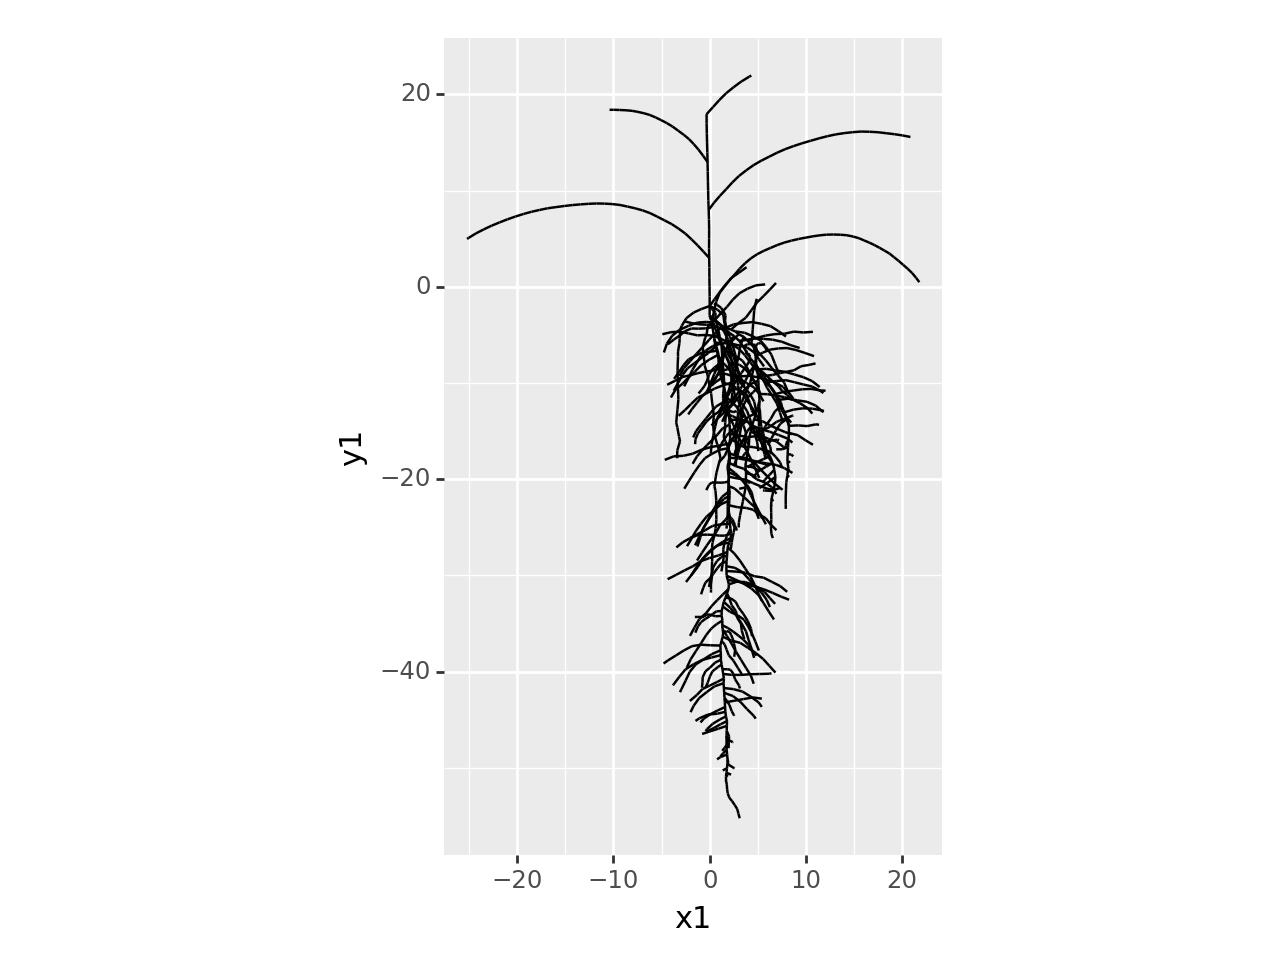

<Figure Size: (640 x 480)>

In [36]:
dat = pd.read_csv("Genügsam.txt", sep=" ")

%matplotlib inline

(ggplot(dat)         # defining what data to use
 + aes()    # defining what variable to use
 + geom_segment(aes(x = "x1", y = "y1", xend = "x2", yend = "y2"))
 + coord_fixed()
)

# 1.2

Basierend auf dem Parameterfile für "Genügsam" verändern sie die Parameter "max. Anzahl der Seminalen (basalen) Wurzeln" (maxB), die Wachstumsrate der Primary (r) und den Abstand der lateralen auf der Primary (ln). Es ist Ihnen überlassen, ob Sie dies im Python-Code direkt machen oder ein zweites Parameterfile erstellen. Visualisieren Sie ebenfalls diese Sorte. Erkenne Sie bereits Unterschiede?





In [53]:
plant = pb.MappedPlant()
path = "../../../modelparameter/structural/rootsystem/"
name = "Genügsam"
plant.readParameters(path + name + ".xml")

N=14
plant.initialize()
plant.simulate(N)

#Modify key parameter
print(pb.root)
for p in plant.getOrganRandomParameter(pb.root):
    p.r = p.r*0.8
    p.ln = p.ln+0.1

ana = pb.SegmentAnalyser(plant)
ana.write("Durstig.txt")

dat = pd.read_csv("Durstig.txt", sep=" ")

%matplotlib inline

(ggplot(dat)         # defining what data to use
 + aes()    # defining what variable to use
 + geom_segment(aes(x = "x1", y = "y1", xend = "x2", yend = "y2"))
 + coord_fixed()
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-53-2c97defaf7b7>, line 12)

# 1.3
Plotten Sie die Wurzellängendichte (RLD [cm cm^-3]) für das gesamte Wurzelsystem zu den Zeitpunkten 3, 5, 7, 10 und 14 Tagen, Vergleichen Sie die RLD für beide Sorten: und diskutieren Sie die Resultate.


**Analyse results from the class *SegmentAnalyser* (values per segment) in a loop**

The main functionality of the *SegmentAnalyser* class is:
* *getParameter(name)* as for *RootSystem* class, but returning a value for each segment, especially the "creationTime" of each segment
* *filter(name, min, max)* will keep only segments where the value of parameter *name* is within [min, max]
* *crop(sdf)* will keep only segments inside a geometry (e.g. in a soil core), segments intersecting the domain boundary are cut.
* *distribution(...)* will create a 1d plot versus depth, where parameters are summed in layers
* *distribution2d(...)* as above but 2d
* *mapPeriodic(length, width)* maps the unconstrained root system into a periodic domain
* *addData(name, data)* attach user data to the segments (e.g. simulation results for visualization or export)

Note that *SegmentAnalyser* is only loosly connected to the original simulation.

The first example shows how to obtain a depth distribution (values per segment) in a simulation loop.

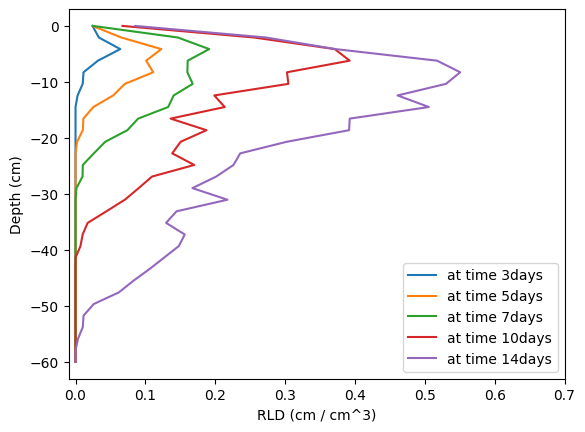

In [27]:
plant = pb.MappedPlant()
path = "../../../modelparameter/structural/rootsystem/"
name = "Genügsam"
plant.readParameters(path + name + ".xml")
plant.setGeometry(pb.SDF_PlantBox(1.e6,1.e6,1.e6))
plant.initialize()

simtimes = [0,3,5,7,10,14] # day
dt_ = np.diff(simtimes) # day
depth = 60 # cm
layers = 30 # [1]

""" Simulation loop """
rsd_ = []
for dt in dt_:
    plant.simulate(dt)
    # _ = vp.plot_roots(rs, "subType") # to observe growth
    ana = pb.SegmentAnalyser(plant) # create a SegmentAnalyser object
    rsd = ana.distribution("length", 0., -depth, layers, True)
    rsd_.append(rsd) # store relevant data in a list

""" vizualize rld_ """
soilvolume = (depth / layers) * 10 * 10
rsd_ = np.array(rsd_) / soilvolume  # convert to density [cm2/cm3]

z_ = np.linspace(0, -depth, layers)  # z - axis
for i, t in enumerate(simtimes[1:]):
    plt.plot(rsd_[i,:], z_, label = "at time "+str(t)+'days')

plt.xlabel("RLD (cm / cm^3)")
plt.ylabel("Depth (cm)")
plt.legend()
plt.xlim(-0.01,0.7)
# plt.savefig("RLD.png")
plt.show()


# 1.4
Untersuchen Sie welcher der drei Parameter am meisten Unterschiede in der RLD verursacht für einen 14 Tage alten Sprössling. Tipp: Verändern Sie jeden Parameter (z.B. x0,5 und x2) einzelen und plotten Sie die RLD. Interpretieren Sie das Ergbeniss.  